# Jokes Dataset EDA

Notes

* Jokes are hard.
    * Some jokes are funny because it assumes "world knowledge".
    * Jokes are funny because they are a surprise, unpredictable.
* Reddit dataset: some titles are part of the joke; some not. Check whether first N chars match to detect.
* It might be worth to classify different types of jokes (puns, etc.)

Conclusions
* Reddit dataset is 1) the largest 2) seems funniest 3) has a meaning score field to distinguish between funny and unfunny jokes, so we'll focus on the reddit set to start with.
* Minor challenges:
    * Some titles are part of the joke
* Major challneges:
    * World knowledge
    * The surprise element in jokes
    * Design network structure to make use of the score
* Data volumn seems quite managable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
pd.options.display.max_colwidth = 5000

%matplotlib inline

# Read in data

In [2]:
data_path = os.getcwd().replace("notebooks", "joke-dataset")
reddit_data = pd.read_json(data_path + "/reddit_jokes.json")
stupidstuff_data = pd.read_json(data_path + "/stupidstuff.json")
wocka_data = pd.read_json(data_path + "/wocka.json")

In [28]:
print(reddit_data.shape)
print(stupidstuff_data.shape)
print(wocka_data.shape)

(194553, 4)
(3773, 4)
(10019, 4)


# EDA

## What does the data look like

### Reddit

In [38]:
reddit_data.head(3)

,body,id,score,title
0,"Now I have to say ""Leroy can you please paint the fence?""",5tz52q,1,I hate how you cant even say black paint anymore
1,Pizza doesn't scream when you put it in the oven .\n\nI'm so sorry.,5tz4dd,0,What's the difference between a Jew in Nazi Germany and pizza ?
2,"...and being there really helped me learn about American culture. So I visited a shop and as I was leaving, the Shopkeeper said ""Have a nice day!"" But I didn't so I sued him.",5tz319,0,I recently went to America....


In [44]:
# scores distribution
reddit_data["score"].describe()

count    194553.000000
mean        118.223255
std         936.231277
min           0.000000
25%           0.000000
50%           3.000000
75%          16.000000
max       48526.000000
Name: score, dtype: float64

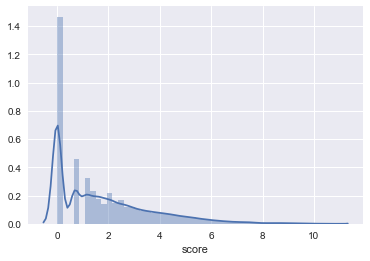

In [47]:
# scores distribution histogram - logscale
sns.distplot(np.log(reddit_data["score"]+1))

Most jokes have 0 or some other low score; some jokes have really high scores (mean is 40 times that of the median)

In [5]:
# What are the funniest jokes. Are they actually funny.
reddit_data.sort_values("score", ascending=False).head(100)

,body,id,score,title
642,On the condition he gets to install windows.\n\n\n,5tn84z,48526,Breaking News: Bill Gates has agreed to pay for Trump's wall
20074,/r/Jokes,4xjyho,45500,I found a place where the recycling rate is 98%
3042,"But its a silly comparison really, its like comparing apples to oranges.",5s9jog,39570,Steve jobs would have been a better president than Donald Trump.
22210,We went and had some drinks. Cool guy. Wants to be a web developer.,4wgall,36421,My girlfriend told me to take the spider out instead of killing it.
35801,Please don't upvote. Her strap-on is huge.,4pj3q3,35772,"For every upvote this gets, my girlfriend and I will try one thrust of anal sex."
4243,"He winked at me and said, ""I'm off duty in ten minutes - meet me in the car park.""",5rmhv3,35412,"Just after my wife had given birth, I asked the doctor, ""How soon do you think we'll be able to have sex?"""
14952,"'Forget everything you learned in college. You won't need it working here.'\n\n'But I never went to college.'\n\n'Well then, I'm sorry. You are underqualified to work here.'",4zu8ii,33626,Forget everything you learned in college...
23433,"Dear sir,\n\nYour internet access has been terminated due to illegal usage.\n\nSincerely, your service provider.",4vvaie,32974,What's a pirate's least favorite letter?
35531,"A Jewish man sends his son to Israel to live there for a while. Eventually he returns home and he is now a Christian. The man finds this to be odd and mentions it to his friend.\n\nThe friend listens, thinks for a moment and says, ""That's odd. I sent my son to Israel as a Jew and he returned as a Christian."" So the two of them went to see the Rabbi. \n\nThey told the Rabbi the story of how they had both sent their sons to Israel as Jews, and how both sons had returned as Christians. The Rabbi listened, thought for a minute and then said ""That's odd. I also sent my son to Israel as a Jew and he returned as a Christian.""\n\nSo the three of them decide to go to Israel to find out what's going on over there. The arrive and go straight to the Western Wall to pray. They explain to God all about how they sent their sons to Israel as Jews and how the all returned as Christians.""\n\nThere is a long silence, and then God begins to speak saying, ""That's odd . . . """,4pnbc6,32017,A Jewish man sends his son to Israel to live there for a while . . .
6679,So I made her marry an old guy she's never met to secure an alliance with the French.\n,5qeezz,31006,My girlfriend kept telling me to treat her like a princess.


In [64]:
# Moderately funny jokes
reddit_data[reddit_data["score"]==16].head(20)

,body,id,score,title
95,"So if you're a great driver, look out for women who are turning.",5txmyo,16,A lot of women turn into great drivers...
566,"It wasn't very nice, I think I'll try it with a croissant next time.",5tpsmu,16,I just put my hair in a bun.
582,*anti-social studies*,5tpbks,16,Schools should have a class designed for introverts...
615,An impasta,5to8g9,16,What do you call a fake noodle?
616,Make sure to go for the juggler.,5to7h6,16,If you're ever attack by a group of clowns....
657,Throw your washing in.,5tmuqg,16,What do you do when a epileptic's having a fit in the bath?
681,Just made my day,5tm242,16,This joke about the Earth's rotation
860,"A woman walks into a store. Billy the clerk and the manager are talking away, and the woman asks the clerk where some stuff is.\n\nWoman: ""Excuse me sir, do you know where the Kleenex, toilet paper, ear cleaners, napkins, and tampons are?\n\nThe manager replies with, ""Dear Lord Billy, help her! She's leaking from every hole!""",5thy98,16,The woman in the store
880,I don't know what they were laced with but I kept tripping,5thei7,16,I bought some shoes from a drug dealer
926,I told him I've been using Reddit for a couple months now and see no changes.\n\nI then saw myself out.,5tg320,16,"My therapist recommended an anonymous community to me, a narcissist. Said that they gather and discuss their day to day accomplishments, annoyances, etc."


Almost all these top jokes are funny because they assume some level of world knowledge. This seems extremely challenging for an AI to get right.

Jokes are funny also because they are unpredictable.

### stupidstuff

In [61]:
stupidstuff_data.head(50)

,body,category,id,rating
0,"A blackjack dealer and a player with a thirteen count in his hand\nwere arguing about whether or not it was appropriate to tip the\ndealer.\n\nThe player said, ""When I get bad cards, it's not the dealer's fault.\nAccordingly, when I get good cards, the dealer obviously had nothing\nto do with it so, why should I tip him?""\n\nThe dealer said, ""When you eat out do you tip the waiter?""\n\n""Yes.""\n\n""Well then, he serves you food, I'm serving you cards, so you should\ntip me.""\n\n""Okay, but, the waiter gives me what I ask for. I'll take an eight.""",Children,1,2.63
1,"At a dinner party, several of the guests were arguing whether men or women were more trustworthy. 'No woman,' said one man, scornfully, 'can keep a secret.' 'I don't know about that,' answered a blonde woman guest. 'I have kept my age a secret since I was twenty-one.' 'You'll let it out some day,' the man insisted. 'I hardly think so!' responded the blonde lady. 'When a woman has kept a secret for twenty-seven years, she can keep it forever.'",Blonde Jokes,2,2.57
2,One day this cop pulls over a blonde for speeding. The cop gets out of his car and asks the blonde for her license.''You cops should get it together. One day you take away my license and the next day you ask me to show it.'',Blonde Jokes,3,3.09
3,"Three women are about to be executed for crimes. One's a brunette, one's a redhead, and one's a blonde.Two guards brings the brunette forward, and the executioner asks if she has any last requests. She says no, and the executioner shouts, ""Ready . . . Aim . . .""Suddenly the brunette yells, ""earthquake!!"" Everyone is startled and looks around. She manages to escape.The angry guards then bring the redhead forward, and the executioner asks if she has any last requests. She says no, and the executioner shouts, ""Ready . . . Aim . . .""The redhead then screams, ""tornado!!"" Yet again, everyone is startled and looks around. She too escapes execution.By this point, the blonde had figured out what the others did. The guards bring her forward, and the executioner asks if she has any last requests. She also says no, and the executioner shouts, Ready . . . Aim . . .""The blonde shouts, ""fire!!""",Blonde Jokes,4,4.10
4,"A girl came skipping home FROM school one day. ""Mommy, Mommy,"" she yelled, ""we were counting today, and all the other kids could only count to four, but I counted to 10. See? 1, 2, 3, 4, 5, 6,7, 8, 9, 10!"" ""Very good,"" said her mother. ""Is it because I'm blonde, Mommy?"" ""Yes, Honey, it's because you're blonde."" The next day the girl came skipping home FROM school. ""Mommy, Mommy,"" She yelled, ""we were saying the alphabet today, and all the other kids could only say it to D, but I said it to G. See? A,b, c, d, e, f, g!"" ""Very good,"" said her mother. ""Is it because I'm blonde, Mommy?"" ""Yes, Honey, it's because you're blonde."" The next day the girl came skipping home FROM school. ""Mommy, Mommy,"" she yelled, ""we were in gym class today, and when we showered, all the other girls had flat chests, but I have these!"" And she lifted her tank top to reveal a pair of 36Cs. ""Very good,"" said her embarrassed mother. ""Is it because I'm blonde, mommy?"" ""No, Honey, it's because you're 25.""",Blonde Jokes,5,4.30
5,"An airline captain was helping a new blonde flight attendant prepare for her first overnight trip. Upon their arrival, the captain showed the flight attendant the best place for airline personnel to eat, shop and stay overnight. The next morning as the pilot was preparing the crew for the day's route, he noticed the new stewardess was missing. He knew which room she was in at the hotel and called her up to ask what happened to her. She answered the phone, crying, and said, ""I can't get out of the room!"" ""You can't get out of your room?"" the captain asked. ""Why not?"" She replied, ""There are only three doors in here,"" she sobbed, ""one is the bathroom, one is the closet, and one has a sign

In [56]:
# Scores distribution
stupidstuff_data["rating"].describe()

count    3773.000000
mean        3.284363
std         1.199279
min         0.000000
25%         2.330000
50%         3.090000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

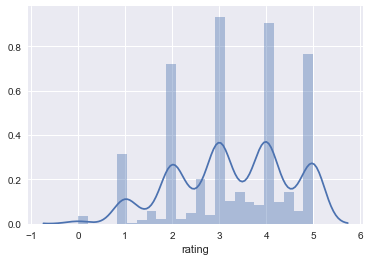

In [57]:
# Scores distribution
sns.distplot(stupidstuff_data["rating"])

Looks normalized.

In [3]:
# Most funny jokes
stupidstuff_data.sort_values("rating", ascending=False).head(50)

,body,category,id,rating
3163,,"Family, Parents",3164,5.0
2741,"There were three fathers to be in a hospital waiting room, waiting for\ntheir babies to be born.\n\nThe nurse came out and told the first father, ""Congratulations, you're\nthe father of twins!""\n\n""It figures,"" the first father said. ""I'm the manager of the Minnesota\nTwins.""\n\nFive minutes later the nurse came out and told the second father,\n""Congratulations you're the father of triplets!""\n\n""It figures,"" the second father said. ""I work for 3M.""\n\nAt that the third father fainted dead away.\n\nThe second father turned to the first and asked, ""What's the matter\nwith him?""\n\nThe first father replied, ""He works for 7-Up!""",Crazy Jokes,2742,5.0
3465,,Business,3466,5.0
2742,"Two brothers, John and Richard lived \nin the same town. John with his 12 year \nold cat, Richard with their 88 year old \nMother. John's whole life was his cat. \nHe never went anywhere without her. One \nday he was faced with a terrible decision. \nHe had to go to England on business for \nhis company and he could not take the cat \ninto England with having to quarantine her \nfor 14 days. He wouldn't do that so he was \nfaced with either losing his job or leaving \nhis cat. \n\nFinally he decided to trust his brother with \nthe cat for the week he would be gone. He \ngave Richard detailed instructions, schedules,\nfood, etc. Finally he flew to London and \ncalled Richard every few hours to make sure \nGracie the cat was ok. 4 days of this went by\nand John was really getting to be a pain in the \nneck. \n\nOn the fifth day when he called, John asked \nRichard how Gracie was and Richard told him. \n""Gracie is dead!"" Well as you can imagine,\nJohn nearly had a heart attack. \n\nWhen he recovered he said to Richard, ""that was \nthe most cruel thing I ever heard. You know \nhow much I loved that cat, why couldn't you \nhave broken it to me gently. You know like when\nI called said something like, 'well she's OK but \nshe is up on the roof.' And then when I called \nthe next time, tell me 'oh oh, bad news, she \nfell off the roof and she's at the vets'. And\nthen the next time break the news that she \npassed away. At least I would have been a little \nprepared for the bad news.""\n\n""Yes, you are right John. I am sorry for being \nso heartless.""\n\nJohn accepted Richard's apology for being so \nuncaring, and then said, ""oh, by the way, how's \nMother?""\n\nRichard then said, ""well, John, she's OK, but she's \non the roof!""",Animals,2743,5.0
3463,,Business,3464,5.0
1674,"If I told you that I have a piece of dirt in my eye, would you move?",Insults,1675,5.0
2748,"We all know how Cinderella wanted to go to the ball but her wicked\nstepmother wouldn't let her and then the fairy godmother pops up\nand gives Cinderella some good news:\n\nThe fairy godmother tells Cinderella that she will provide for her,\neverything she needs to go to the ball, but only on two conditions.\nCinderella asks what she needs to do and the fairy godmother replies,\n""First, you must wear a diaphragm."" \n\nCinderella's mouth drops open and says, ""You must be crazy! I'm on \nthe pill, and I don't need to wear a diaphragm."" \n\nThe fairy godmother reminds Cinderella about all the handsome princes \nthat will be attending the ball that night, and Cinderella agrees to \nwear a diaphragm.\n\n""Well, what's the second condition?"" Cinderella asked.\n\nThe fairy godmother replies, ""You must be back home by 2:00 A.M.\nWell, Cinderella explains that if she's gonna go party with the\nprinces, she wants to be out all night long. The fairy godmother\ntells Cinderella that if she's not home by 2 A.M., then her diaphragm\nwill turn into a pumpkin. She goes on to say that at least she'll be\nwith the princes most of the evening, so Cinderella agrees to be home\nat 2 A.M...\n\nAt 2 A.M., Cinderella doesn't show up...3 A.M., no Cinderella...4 A.M., no\nCinderella...finally, at 5 A.M., Cinderella shows up at the

## wocka

In [32]:
wocka_data.head()

,body,category,id,title
0,What do you call a cow with no legs?\r\n\r\nGround Beef!,Animal,1,Cow With No Legs
1,What do you call a cow jumping over a barbed wire fence?\r\n\r\nUtter destruction.,Animal,2,Jumping Cow
2,What's black and white and red all over?\r\n\r\nA newspaper.,Other / Misc,4,"Black, White and Red"
3,"So, this guy walks into a bar.\r\n\r\nAnd says, ""ouch"".",Bar,5,Guy in a Bar
4,"If the opposite of pro is con, isn't the opposite of progress, congress?",One Liners,6,Progress


No scores